In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pvlib
from pvlib.location import Location

# Define location: Rome, Italy
rome = Location(latitude=41.9028, longitude=12.4964, tz='Europe/Rome', altitude=20, name='Rome')

# Time range for a single day: summer solstice and winter solstice
times_summer = pd.date_range('2025-06-21 04:00', '2025-06-21 21:00', freq='10min', tz=rome.tz)
times_winter = pd.date_range('2025-12-21 07:00', '2025-12-21 17:00', freq='10min', tz=rome.tz)

# Get solar position data
solarpos_summer = rome.get_solarposition(times_summer)
solarpos_winter = rome.get_solarposition(times_winter)

# Plotting the sun path
plt.figure(figsize=(10, 6))
plt.plot(solarpos_summer['azimuth'], solarpos_summer['apparent_elevation'], label='Summer Solstice (June 21)', color='orange')
plt.plot(solarpos_winter['azimuth'], solarpos_winter['apparent_elevation'], label='Winter Solstice (Dec 21)', color='blue')

plt.title('Sun Path Diagram for Rome (Summer vs Winter Solstice)')
plt.xlabel('Azimuth (°)')
plt.ylabel('Solar Elevation (°)')
plt.grid(True)
plt.legend()
plt.xlim(0, 360)
plt.ylim(0, 90)
plt.tight_layout()
plt.show()

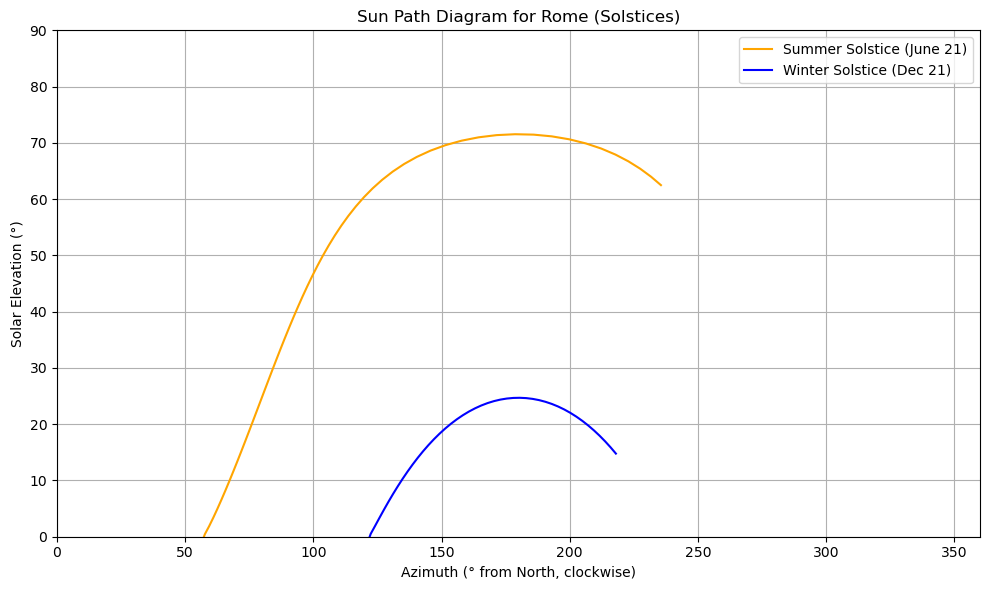

In [17]:
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from pysolar.solar import get_altitude, get_azimuth
import pytz

# Location: Rome, Italy
latitude = 41.9028
longitude = 12.4964
timezone = pytz.timezone("Europe/Rome")

# Generate solar position data for summer and winter solstice
def generate_solar_path(date_str, label, color):
    date = datetime.strptime(date_str, "%Y-%m-%d")
    times = [timezone.localize(date + timedelta(minutes=10 * i)) for i in range(90)]  # 90 steps of 10 min
    altitudes = [get_altitude(latitude, longitude, t) for t in times]
    azimuths = [get_azimuth(latitude, longitude, t) for t in times]
    return azimuths, altitudes, label, color

# Generate paths
summer_az, summer_alt, _, _ = generate_solar_path("2025-06-21", "Summer Solstice", "orange")
winter_az, winter_alt, _, _ = generate_solar_path("2025-12-21", "Winter Solstice", "blue")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(summer_az, summer_alt, label="Summer Solstice (June 21)", color="orange")
plt.plot(winter_az, winter_alt, label="Winter Solstice (Dec 21)", color="blue")

plt.title("Sun Path Diagram for Rome (Solstices)")
plt.xlabel("Azimuth (° from North, clockwise)")
plt.ylabel("Solar Elevation (°)")
plt.grid(True)
plt.legend()
plt.xlim(0, 360)
plt.ylim(0, 90)
plt.tight_layout()
plt.show()

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from pvlib.location import Location

rome = Location(latitude=41.9028, longitude=12.4964, tz='Europe/Rome', altitude=20)

# Solstice dates
times_summer = pd.date_range('2025-06-21 04:00', '2025-06-21 21:00', freq='10min', tz='Europe/Rome')
times_winter = pd.date_range('2025-12-21 07:00', '2025-12-21 17:00', freq='10min', tz='Europe/Rome')

solarpos_summer = rome.get_solarposition(times_summer)
solarpos_winter = rome.get_solarposition(times_winter)

plt.figure(figsize=(10, 6))
plt.plot(solarpos_summer['azimuth'], solarpos_summer['apparent_elevation'], label='Summer Solstice', color='orange')
plt.plot(solarpos_winter['azimuth'], solarpos_winter['apparent_elevation'], label='Winter Solstice', color='blue')
plt.xlabel('Azimuth (°)')
plt.ylabel('Solar Elevation (°)')
plt.title('Sun Path for Rome - Summer vs Winter Solstice')
plt.legend()
plt.grid()
plt.xlim(0, 360)
plt.ylim(0, 90)
plt.show()

In [18]:
# Sun Path Diagram for Rome: Summer vs Winter Solstice

import matplotlib.pyplot as plt
import pandas as pd
from pvlib.location import Location

# Define Rome location
rome = Location(
    latitude=41.9028, 
    longitude=12.4964, 
    tz='Europe/Rome', 
    altitude=20, 
    name='Rome'
)

# Define time ranges for solstices
times_summer = pd.date_range(
    start='2025-06-21 04:00', 
    end='2025-06-21 21:00', 
    freq='10min', 
    tz='Europe/Rome'
)
times_winter = pd.date_range(
    start='2025-12-21 07:00', 
    end='2025-12-21 17:00', 
    freq='10min', 
    tz='Europe/Rome'
)

# Get solar positions
solarpos_summer = rome.get_solarposition(times_summer)
solarpos_winter = rome.get_solarposition(times_winter)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(
    solarpos_summer['azimuth'], 
    solarpos_summer['apparent_elevation'], 
    label='Summer Solstice (June 21)', 
    color='orange'
)
plt.plot(
    solarpos_winter['azimuth'], 
    solarpos_winter['apparent_elevation'], 
    label='Winter Solstice (Dec 21)', 
    color='blue'
)

plt.title('Sun Path Diagram for Rome')
plt.xlabel('Azimuth (° from North, clockwise)')
plt.ylabel('Solar Elevation (°)')
plt.grid(True)
plt.legend()
plt.xlim(0, 360)
plt.ylim(0, 90)
plt.tight_layout()
plt.show()


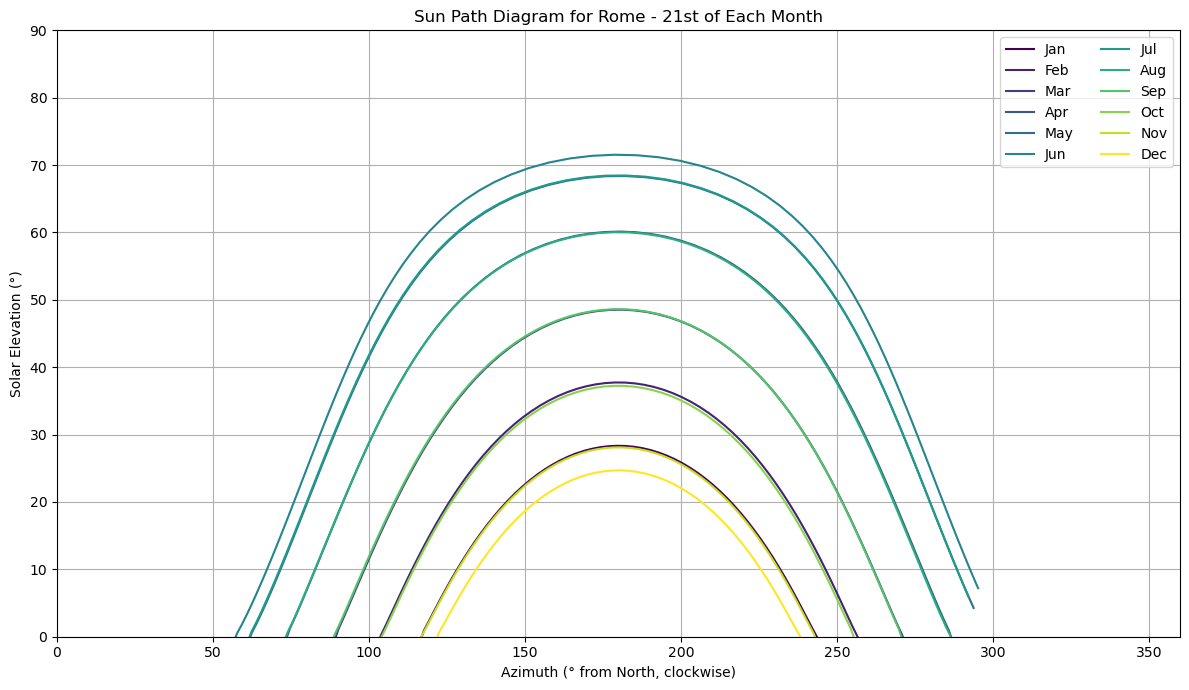

In [19]:
# Sun Path Diagram for Rome – 12 Months + Overhang Calculator

import matplotlib.pyplot as plt
import pandas as pd
from pvlib.location import Location
import numpy as np

# Rome location
rome = Location(latitude=41.9028, longitude=12.4964, tz='Europe/Rome', altitude=20)

# Days of the year to evaluate (21st of each month)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dates = [f'2025-{str(m+1).zfill(2)}-21' for m in range(12)]

# Colors for plots
colors = plt.cm.viridis(np.linspace(0, 1, len(dates)))

plt.figure(figsize=(12, 7))

# Plot sun paths for each month
for date_str, color, month in zip(dates, colors, months):
    times = pd.date_range(start=f'{date_str} 05:00', end=f'{date_str} 20:00', freq='10min', tz='Europe/Rome')
    solpos = rome.get_solarposition(times)
    plt.plot(solpos['azimuth'], solpos['apparent_elevation'], label=month, color=color)

plt.title('Sun Path Diagram for Rome - 21st of Each Month')
plt.xlabel('Azimuth (° from North, clockwise)')
plt.ylabel('Solar Elevation (°)')
plt.xlim(0, 360)
plt.ylim(0, 90)
plt.grid(True)
plt.legend(loc='upper right', ncol=2)
plt.tight_layout()
plt.show()

In [21]:
import math

def overhang_depth(window_height_m, solar_angle_deg):
    # Avoid division by zero
    if solar_angle_deg <= 0:
        return float('inf')
    angle_rad = math.radians(solar_angle_deg)
    return window_height_m / math.tan(angle_rad)

# Example: 2m tall window
summer_angle = 72  # typical for Rome in June
winter_angle = 24  # typical for Rome in December

depth_summer = overhang_depth(2, summer_angle)
depth_winter = overhang_depth(2, winter_angle)

print(f"Overhang depth to block summer sun at 72°: {depth_summer:.2f} m")
print(f"Overhang depth to block winter sun at 24°: {depth_winter:.2f} m (usually not desired)")

Overhang depth to block summer sun at 72°: 0.65 m
Overhang depth to block winter sun at 24°: 4.49 m (usually not desired)


/home/fabiolana/miniconda3/envs/geo-ai/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/fabiolana/miniconda3/envs/geo-ai/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/fabiolana/miniconda3/envs/geo-ai/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/fabiolana/miniconda3/envs/geo-ai/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/fabiolana/miniconda3/envs/geo-ai/lib/python3.12/site-pa

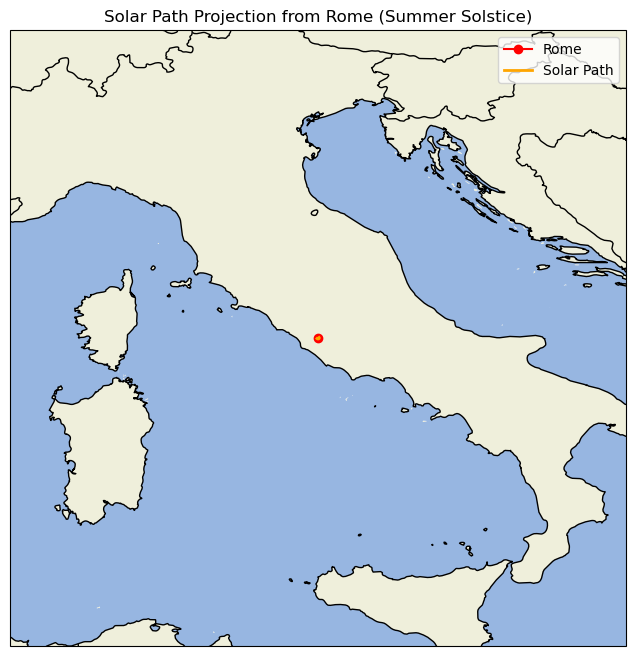

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime, timedelta
import numpy as np
import pytz
from pysolar.solar import get_altitude, get_azimuth

# Rome, Italy
lat, lon = 41.9028, 12.4964
timezone = pytz.timezone("Europe/Rome")

# Generate datetime range (e.g., sunrise to sunset)
base_date = datetime(2025, 6, 21)
times = [timezone.localize(base_date + timedelta(minutes=10*i)) for i in range(90)]

# Compute solar azimuth and altitude
azimuths = [get_azimuth(lat, lon, t) for t in times]
altitudes = [get_altitude(lat, lon, t) for t in times]

# Project direction points on Earth surface (simplified radial projection)
radius_km = 100  # How far to project the sun ray (arbitrary for visualization)
earth_radius = 6371  # Earth radius in km

sun_lats = []
sun_lons = []

for az, alt in zip(azimuths, altitudes):
    if alt > 0:  # Only consider sun above the horizon
        az_rad = np.radians(az)
        dlat = (radius_km / earth_radius) * np.cos(az_rad)
        dlon = (radius_km / earth_radius) * np.sin(az_rad) / np.cos(np.radians(lat))
        sun_lats.append(lat + dlat)
        sun_lons.append(lon + dlon)

# Plot on map
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon - 5, lon + 5, lat - 5, lat + 5], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Plot Rome
ax.plot(lon, lat, marker='o', color='red', label='Rome', transform=ccrs.PlateCarree())

# Plot solar path as line
ax.plot(sun_lons, sun_lats, color='orange', linewidth=2, label='Solar Path', transform=ccrs.PlateCarree())

plt.title("Solar Path Projection from Rome (Summer Solstice)")
plt.legend()
plt.show()

/home/fabiolana/miniconda3/envs/geo-ai/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/fabiolana/miniconda3/envs/geo-ai/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/fabiolana/miniconda3/envs/geo-ai/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


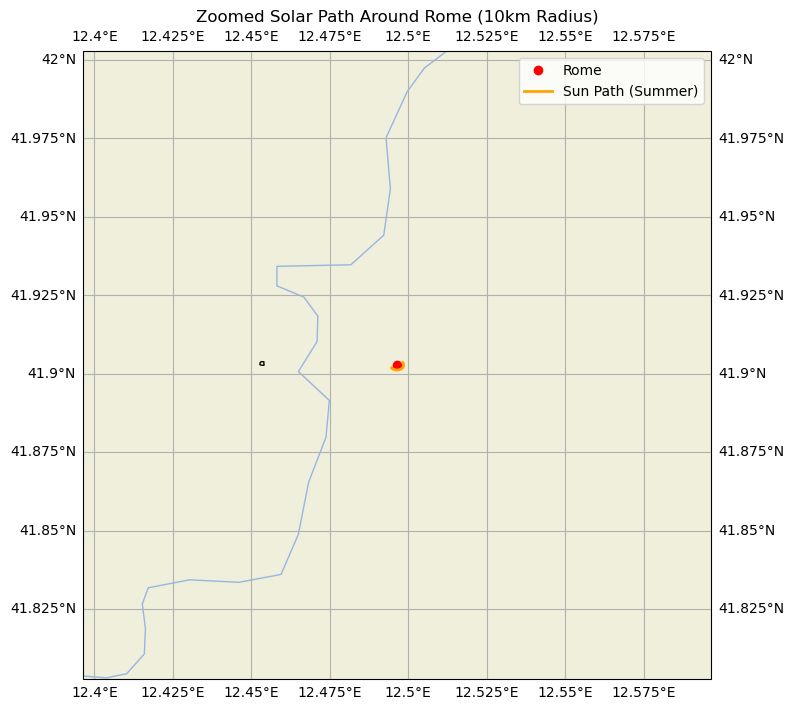

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime, timedelta
import numpy as np
import pytz
from pysolar.solar import get_altitude, get_azimuth

# Rome, Italy
lat, lon = 41.9028, 12.4964
timezone = pytz.timezone("Europe/Rome")

# Time steps (e.g., summer solstice)
base_date = datetime(2025, 6, 21)
times = [timezone.localize(base_date + timedelta(minutes=10*i)) for i in range(90)]

# Solar azimuth and altitude
azimuths = [get_azimuth(lat, lon, t) for t in times]
altitudes = [get_altitude(lat, lon, t) for t in times]

# Convert to nearby lat/lon points to simulate direction of the sun
radius_km = 10  # shorter radius for close zoom
earth_radius = 6371

sun_lats = []
sun_lons = []

for az, alt in zip(azimuths, altitudes):
    if alt > 0:  # sun above horizon
        az_rad = np.radians(az)
        dlat = (radius_km / earth_radius) * np.cos(az_rad)
        dlon = (radius_km / earth_radius) * np.sin(az_rad) / np.cos(np.radians(lat))
        sun_lats.append(lat + dlat)
        sun_lons.append(lon + dlon)

# Plot map
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Tighter extent around Rome (~10km radius)
ax.set_extent([lon - 0.1, lon + 0.1, lat - 0.1, lat + 0.1], crs=ccrs.PlateCarree())

# Add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS.with_scale('10m'))
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.LAKES.with_scale('10m'), alpha=0.5)
ax.add_feature(cfeature.RIVERS.with_scale('10m'))
ax.gridlines(draw_labels=True)

# Plot Rome location
ax.plot(lon, lat, 'ro', label='Rome', markersize=6, transform=ccrs.PlateCarree())

# Plot solar path
ax.plot(sun_lons, sun_lats, color='orange', label='Sun Path (Summer)', linewidth=2, transform=ccrs.PlateCarree())

plt.title("Zoomed Solar Path Around Rome (10km Radius)")
plt.legend()
plt.tight_layout()
plt.show()

/home/fabiolana/miniconda3/envs/geo-ai/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \


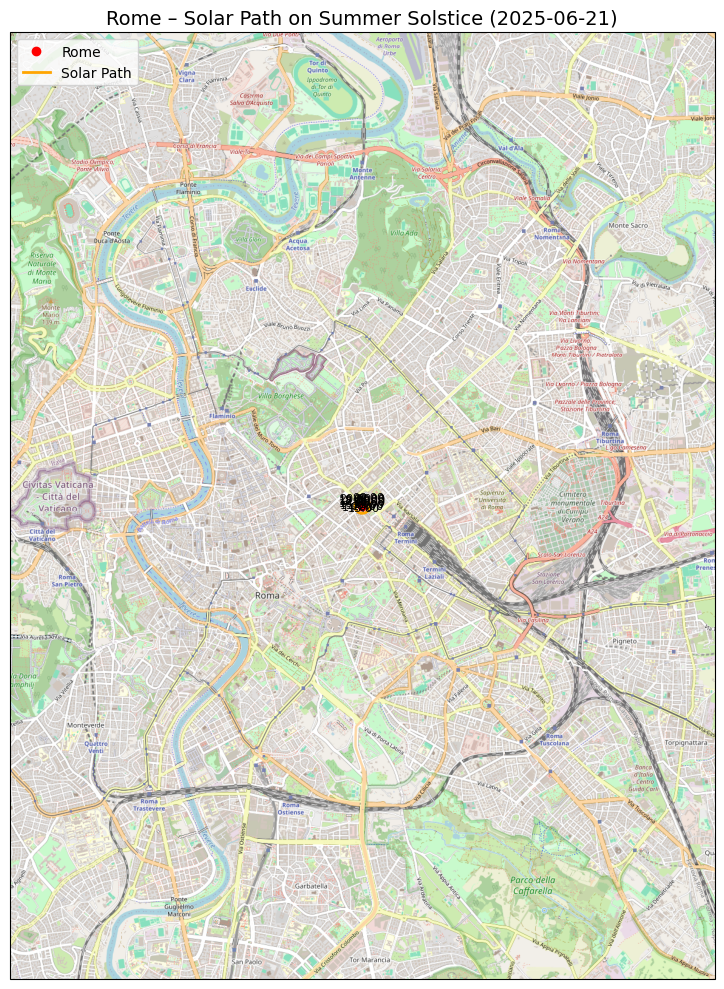

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from datetime import datetime, timedelta
import numpy as np
import pytz
from pysolar.solar import get_altitude, get_azimuth

# Rome coordinates and timezone
lat, lon = 41.9028, 12.4964
tz = pytz.timezone('Europe/Rome')

# Prepare time steps for solar positions
base_date = datetime(2025, 6, 21)
times = [tz.localize(base_date + timedelta(minutes=10*i)) for i in range(0, 150)]  # ~7am to 9pm

# Compute solar positions
azimuths = [get_azimuth(lat, lon, t) for t in times]
altitudes = [get_altitude(lat, lon, t) for t in times]

# Filter only when sun is above the horizon
visible_times = []
sun_lats = []
sun_lons = []
labels = []

radius_km = 5  # length of sun ray direction for map
earth_radius = 6371

for t, az, alt in zip(times, azimuths, altitudes):
    if alt > 0:
        az_rad = np.radians(az)
        dlat = (radius_km / earth_radius) * np.cos(az_rad)
        dlon = (radius_km / earth_radius) * np.sin(az_rad) / np.cos(np.radians(lat))
        sun_lats.append(lat + dlat)
        sun_lons.append(lon + dlon)
        visible_times.append(t)
        # Label every hour
        if t.minute == 0:
            labels.append(t.strftime('%H:%M'))
        else:
            labels.append("")  # empty label otherwise

# Base map with OpenStreetMap tiles
tiler = cimgt.OSM()
mercator = tiler.crs

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=mercator)

# Set extent around Rome (zoom ~10 km radius)
buffer = 0.05
ax.set_extent([lon - buffer, lon + buffer, lat - buffer, lat + buffer], crs=ccrs.PlateCarree())
ax.add_image(tiler, 14)  # zoom level: higher = more detail

# Plot Rome location
ax.plot(lon, lat, 'ro', transform=ccrs.PlateCarree(), label='Rome', markersize=6)

# Plot solar path
ax.plot(sun_lons, sun_lats, '-', color='orange', linewidth=2, transform=ccrs.PlateCarree(), label='Solar Path')

# Add labels for each hour
for slon, slat, label in zip(sun_lons, sun_lats, labels):
    if label:
        ax.text(slon, slat, label, transform=ccrs.PlateCarree(), fontsize=8, ha='center', va='bottom', color='black')

# Styling
plt.title("Rome – Solar Path on Summer Solstice (2025-06-21)", fontsize=14)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/home/fabiolana/miniconda3/envs/geo-ai/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \


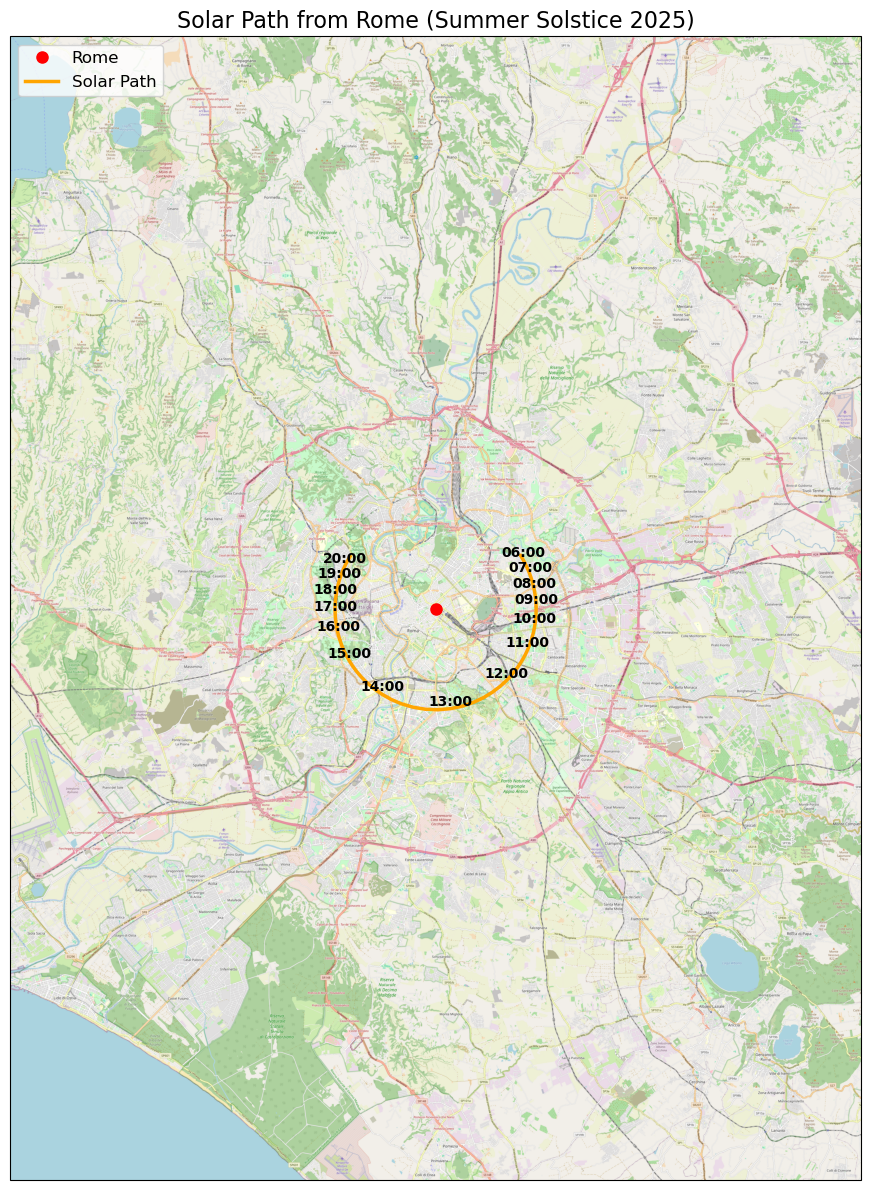

In [29]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from datetime import datetime, timedelta
import numpy as np
import pytz
from pysolar.solar import get_altitude, get_azimuth

# Rome coordinates and timezone
lat, lon = 41.9028, 12.4964
tz = pytz.timezone('Europe/Rome')

# Time steps for solar path
base_date = datetime(2025, 6, 21)
times = [tz.localize(base_date + timedelta(minutes=10 * i)) for i in range(0, 150)]  # 7am–9pm

# Compute solar azimuth and altitude
azimuths = [get_azimuth(lat, lon, t) for t in times]
altitudes = [get_altitude(lat, lon, t) for t in times]

# Project direction to sun using large radius (to make the path "big")
radius_km = 280  # Increase arc distance to stretch path
earth_radius = 6371

sun_lats = []
sun_lons = []
labels = []

for t, az, alt in zip(times, azimuths, altitudes):
    if alt > 0:  # Only above horizon
        az_rad = np.radians(az)
        dlat = (radius_km / earth_radius) * np.cos(az_rad)
        dlon = (radius_km / earth_radius) * np.sin(az_rad) / np.cos(np.radians(lat))
        sun_lats.append(lat + dlat)
        sun_lons.append(lon + dlon)
        if t.minute == 0:
            labels.append(t.strftime('%H:%M'))
        else:
            labels.append("")

# Map setup with OpenStreetMap
tiler = cimgt.OSM()
mercator = tiler.crs

fig = plt.figure(figsize=(12, 12))  # Bigger figure
ax = plt.axes(projection=mercator)

# Set extent around Rome (zoomed but includes full path)
ax.set_extent([lon - 0.25, lon + 0.25, lat - 0.25, lat + 0.25], crs=ccrs.PlateCarree())
ax.add_image(tiler, 13)  # 13 is decent for balance of detail/coverage

# Plot center (Rome)
ax.plot(lon, lat, 'ro', transform=ccrs.PlateCarree(), label='Rome', markersize=8)

# Plot solar path
ax.plot(sun_lons, sun_lats, '-', color='orange', linewidth=2.5, transform=ccrs.PlateCarree(), label='Solar Path')

# Add hour labels along path
for slon, slat, label in zip(sun_lons, sun_lats, labels):
    if label:
        ax.text(slon, slat, label, transform=ccrs.PlateCarree(),
                fontsize=10, ha='center', va='bottom', color='black', weight='bold')

# Final styling
plt.title("Solar Path from Rome (Summer Solstice 2025)", fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

In [31]:
from pysolar.solar import *
import datetime

latitude = 42.206
longitude = -71.382

date = datetime.datetime(2007, 2, 18, 15, 13, 1, 130320, tzinfo=datetime.timezone.utc)
print(get_altitude(latitude, longitude, date))

30.914468243599078


In [32]:
latitude_deg = 42.206 # positive in the northern hemisphere
longitude_deg = -71.382 # negative reckoning west from prime meridian in Greenwich, England
date = datetime.datetime(2007, 2, 18, 15, 13, 1, 130320, tzinfo=datetime.timezone.utc)
altitude_deg = get_altitude(latitude_deg, longitude_deg, date)
radiation.get_radiation_direct(date, altitude_deg)

/home/fabiolana/miniconda3/envs/geo-ai/lib/python3.12/site-packages/pysolar/numeric.py:62: UserWarning: no explicit representation of timezones available for np.datetime64
  dd = numpy.array(d, dtype='datetime64[D]')
/home/fabiolana/miniconda3/envs/geo-ai/lib/python3.12/site-packages/pysolar/numeric.py:63: UserWarning: no explicit representation of timezones available for np.datetime64
  dy = numpy.array(d, dtype='datetime64[Y]')


np.float64(909.5822919390324)

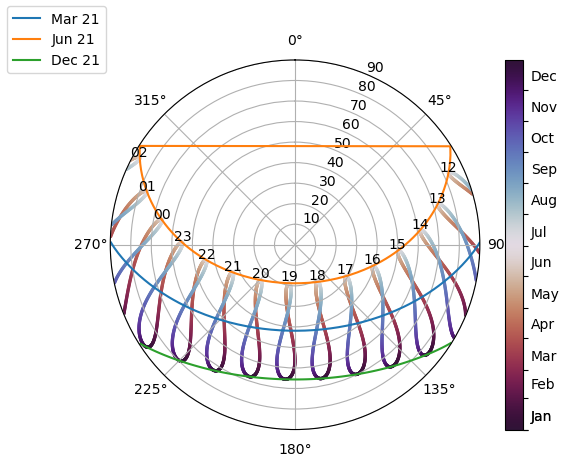

In [35]:
from pvlib import solarposition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tz = 'Europe/Rome'
lat, lon = 42.206 ,-71.382

times = pd.date_range('2019-01-01 00:00:00', '2020-01-01', freq='h', tz=tz)
solpos = solarposition.get_solarposition(times, lat, lon)
# remove nighttime
solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]

ax = plt.subplot(1, 1, 1, projection='polar')
# draw the analemma loops
points = ax.scatter(np.radians(solpos.azimuth), solpos.apparent_zenith,
                    s=2, label=None, c=solpos.index.dayofyear,
                    cmap='twilight_shifted_r')
# add and format colorbar
cbar = ax.figure.colorbar(points)
times_ticks = pd.date_range('2019-01-01', '2020-01-01', freq='MS', tz=tz)
cbar.set_ticks(ticks=times_ticks.dayofyear, labels=[], minor=False)
cbar.set_ticks(ticks=times_ticks.dayofyear+15,
               labels=times_ticks.strftime('%b'),
               minor=True)
cbar.ax.tick_params(which='minor', width=0)

# draw hour labels
for hour in np.unique(solpos.index.hour):
    # choose label position by the smallest radius for each hour
    subset = solpos.loc[solpos.index.hour == hour, :]
    r = subset.apparent_zenith
    pos = solpos.loc[r.idxmin(), :]
    ax.text(np.radians(pos['azimuth']), pos['apparent_zenith'],
            str(hour).zfill(2), ha='center', va='bottom')

# draw individual days
for date in pd.to_datetime(['2019-03-21', '2019-06-21', '2019-12-21']):
    times = pd.date_range(date, date+pd.Timedelta('24h'), freq='5min', tz=tz)
    solpos = solarposition.get_solarposition(times, lat, lon)
    solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]
    label = date.strftime('%b %d')
    ax.plot(np.radians(solpos.azimuth), solpos.apparent_zenith, label=label)

ax.figure.legend(loc='upper left')

# change coordinates to be like a compass
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rmax(90)

plt.show()